<img src="pic_1.png" />

<img src="pic_2.png" />

In [ ]:
#import most of the libraries needed
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
#set options to show all the columns
pd.set_option("display.max_columns", None)

<img src="pic_3.png" />

<img src="pic_8.png" />

### **Project Overview:**
The goal for this research is to **predict a diamond’s price** based on each diamond’s 4C (carat, cut, color, clarity) as well as other statistics. This has important business implications for both customers and sellers. 

For customers, an accurate price prediction can be a helpful benchmark for them to compare to the actual diamond selling price on the market and evaluate if diamonds are priced fairly. For sellers, the diamond price prediction is useful in their pricing strategies. By approximating different diamonds’ prices using the machine learning models, sellers can then implement pricing strategies to ensure that their products are priced fairly and competitively in the market.

### Feature Description:
- Price: Price in US dollars
- Carat: Diamond's physical weight measured in metric carats
- Cut: Determing the quality of the cut, the more precising the diamond is cut, the more captivating the diamond is to the eye
- Color: The color of gem-quality diamonds ranges from colorless to light yellow or light brown, colourless is the rarest
- Clarity: Diamonds without inclusions or blemishes are rare
- X: Length in mm
- Y: Width in mm
- Z: Depth in mm
- Depth: Diamond's height(in millimetres) measured from the culet(bottom tip) to the table(flat top surface) in percentage
- Table: Table width of the top of the diamond relative to widest point in percentage

**Dataset Link**: https://www.kaggle.com/datasets/shubhankitsirvaiya06/diamond-price-prediction

In [ ]:
#load the csv file
df = pd.read_csv('diamonds.csv') 

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#check the missing values
df.isna().sum().sum()

0

In [ ]:
df.shape

(53940, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
#drop out dimensionless data
df= df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

### Data Set Information:
- The data set contains 53,940 data points, 9 features which are carat, cut, color,clarity, depth, table, and dimensional features x, y, z. The mean carat weight is 0.7979 and average price is $3932.79.
- The data set does not contain any missing values. Each diamond should be 3-dimensional, having non-zero values for x, y, z. In the data set, there are 20 values with a zero value in either x, y, or z. By dropping these dimensionless data points, it reduced the data set to a total of 53,920 data points.

<img src="pic_4.png" />

### Plotting:
- In order to capture the underlying trends of the dataset, we plot different types of graphs to aid visualization.
- By plotting the scatter matrix, it seems that there are some outliers in the dataset, especially in features y and z. 
- To determine the outliers to be removed, we plot 4 more plots of depth and dimensions against the diamond price.
- Depth less than 50 mm or greater than 75 mm, table less than 50 mm or greater than 75 mm, y less than 20 mm, z less than 2 mm or greater than 10 mm are removed from the data set.
- We further removed 21 data points, reducing the data set to 53,899 data points.

array([[<AxesSubplot:xlabel='carat', ylabel='carat'>,
        <AxesSubplot:xlabel='depth', ylabel='carat'>,
        <AxesSubplot:xlabel='table', ylabel='carat'>,
        <AxesSubplot:xlabel='price', ylabel='carat'>,
        <AxesSubplot:xlabel='x', ylabel='carat'>,
        <AxesSubplot:xlabel='y', ylabel='carat'>,
        <AxesSubplot:xlabel='z', ylabel='carat'>],
       [<AxesSubplot:xlabel='carat', ylabel='depth'>,
        <AxesSubplot:xlabel='depth', ylabel='depth'>,
        <AxesSubplot:xlabel='table', ylabel='depth'>,
        <AxesSubplot:xlabel='price', ylabel='depth'>,
        <AxesSubplot:xlabel='x', ylabel='depth'>,
        <AxesSubplot:xlabel='y', ylabel='depth'>,
        <AxesSubplot:xlabel='z', ylabel='depth'>],
       [<AxesSubplot:xlabel='carat', ylabel='table'>,
        <AxesSubplot:xlabel='depth', ylabel='table'>,
        <AxesSubplot:xlabel='table', ylabel='table'>,
        <AxesSubplot:xlabel='price', ylabel='table'>,
        <AxesSubplot:xlabel='x', ylabel='table'>,


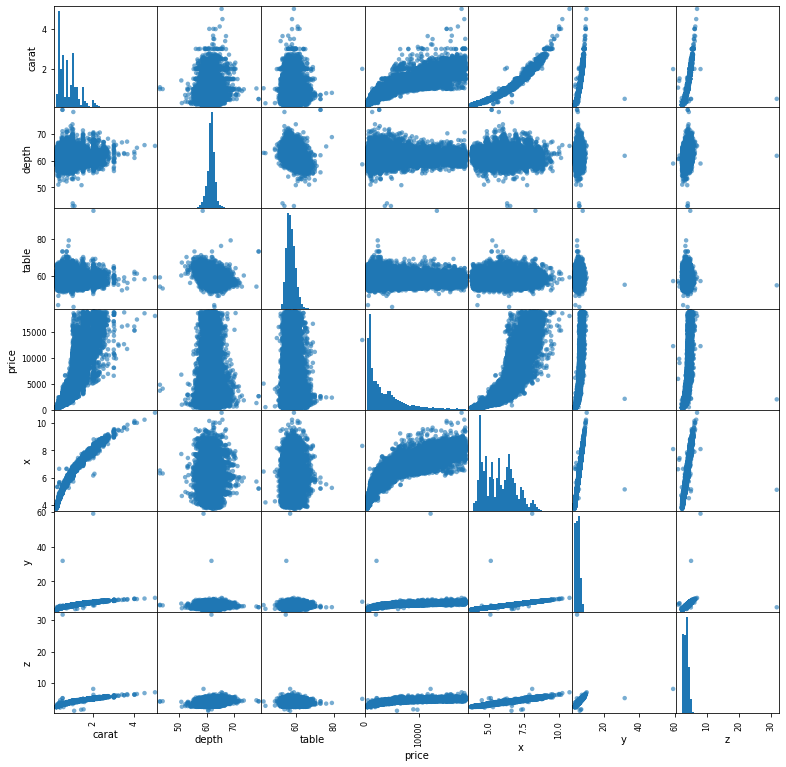

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df, figsize=(13, 13),
                           marker='o', hist_kwds={'bins': 50}, s=20,  
                           alpha=.6)   

#### Takeaways:
- Carat, dimension x,y, z have clear positive relaionship with price.
- There seem to have outliers in y and z

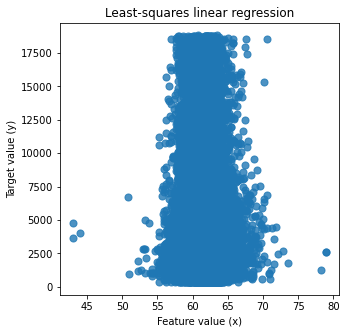

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df['depth'], df['price'], marker= 'o', s=50, alpha=0.8)
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

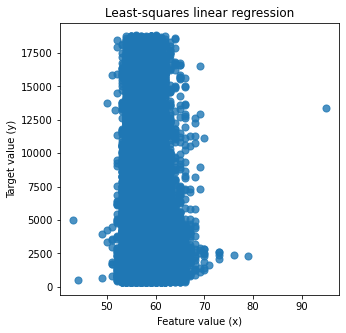

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df['table'], df['price'],marker= 'o', s=50, alpha=0.8)
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

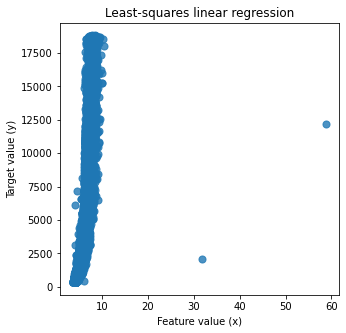

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df['y'], df['price'],marker= 'o', s=50, alpha=0.8)
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

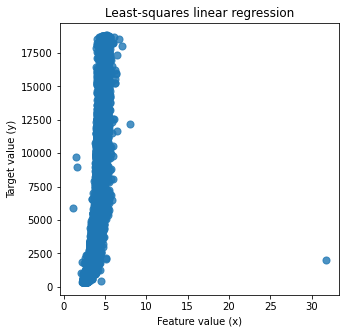

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df['z'], df['price'],marker= 'o', s=50, alpha=0.8)
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [ ]:
#move out the outliers
df = df[(df["depth"]<75)&(df["depth"]>50)]
df = df[(df["table"]<75)&(df["table"]>50)]
df = df[(df["y"]<20)]
df = df[(df["z"]<10)&(df["z"]>2)]
df.shape

(53899, 10)

**Takeaway:**
- There are some outliers in the variable **table**.
- Then, we decide to remove the values that smaller than 50 and larger than 75.

### Categorical attributes distributions:
- To aid understanding of the data set, we plot several count plots to visualize the distribution of the diamonds in the data set.
- The majority of the diamonds in the data set has either an ideal or premium cut; either a color of E, F, or G; and a clarity of SI1 or VS2.
- The distribution of the diamond's quality has certain indications on the final price diamonds, which can be helpful for us to reach the business recommendations.

<AxesSubplot:xlabel='cut', ylabel='count'>

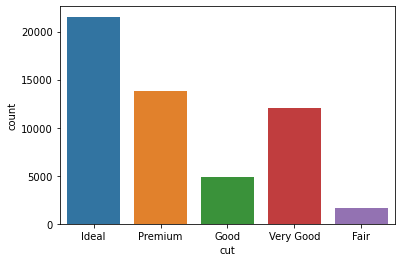

In [ ]:
import seaborn as sns

sns.countplot(x='cut', data=df)

<AxesSubplot:xlabel='color', ylabel='count'>

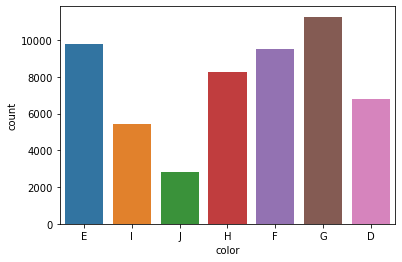

In [ ]:
sns.countplot(x='color', data=df)

<AxesSubplot:xlabel='clarity', ylabel='count'>

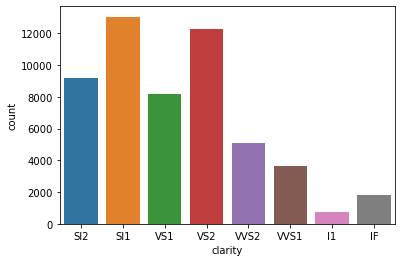

In [ ]:
sns.countplot(x='clarity', data=df)

<AxesSubplot:ylabel='cut'>

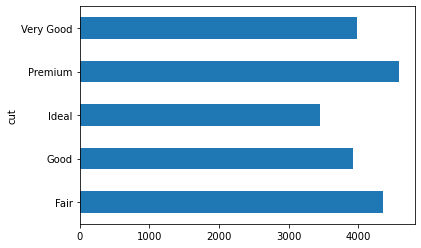

In [ ]:
df.groupby('cut')['price'].mean().plot(kind='barh')

**Takeaway:**
- The **Premium** cut has the highest average price.
- The quality for the cut in increasing order is: Fair, Good, Very Good, Premium, and Ideal.

<AxesSubplot:ylabel='clarity'>

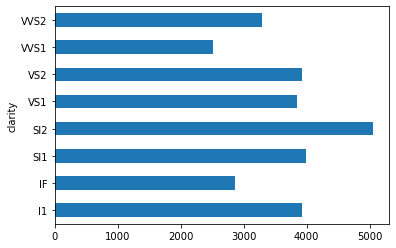

In [ ]:
df.groupby('clarity')['price'].mean().plot(kind='barh')

**Takeaway:**
- The **SI2** clarity has the highest average price.
- The clarity in the order from best to worst is: IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1.

<AxesSubplot:ylabel='color'>

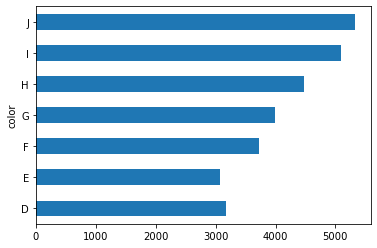

In [ ]:
df.groupby('color')['price'].mean().plot(kind='barh')

**Takeaway:**
- The color **J** has the highest average price.
- The color of the diamond in order from best to worst is: D, E, F, G, H, I, J.

### Next Step:
- The visualized histograms show that the best quality of the diamonds not always has the highest average price. However, in the graphs, we only look at price against with one categorical variable. The graphs cannot show how the price would change if we take all variables into consideration. Therefore, we choose to establish a regression model to help better predict the diamond price.

<img src="pic_5.png" />

### Data Preprocessing:
- We set price as the target y variable as our goal is to predict the price of diamonds, we decide to add all the 9 features into our model since they are all the important attributes of diamonds and have some relations with the price as shown in the visualizations.
- We train and split the data with a random state of 1 and use the default split size.
- In the data set, we have 3 categorical variables: cut, color, clarity. And 6 numerical variables other than the target variable price: carat, depth, table, x, y, z.
- For data preprocessing, we decide to use make_column_transformer and build a pipeline, then generate in the gridsearchcv as we also want to tune the hyperparameters.

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
X=df.drop(columns = 'price')
y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
col_cat =['cut', 'color', 'clarity']
col_num = ['carat','depth', 'table','x', 'y', 'z']

## Model 1: Linear Regression

- To create and apply separate transformers for numerical and categorical variables, we used make_column_transformer. 
- Creating a pipeline helped to keep data moedeling organized. 
- For the linear regression model, we chose to use polynomial features degree ranging from 1 to 3, and fit the training data with specified degree from 1 to 3 in paramters with 5-fold cross-validation.
- After looping through predefined hyperparameters and fit the model on the training set, the best parameter from the listed hyperparamters is linear regression with a polynomial feature of degree of 2. 
- The best score on the validation set is 0.971, the best model on test set is 0.970.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe_cat = OneHotEncoder()
pipe_num = StandardScaler()

preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num)) 

pipe = make_pipeline(preprocessor, PolynomialFeatures(), LinearRegression()) 
param_grid = {'polynomialfeatures__degree': range(1,4)} 

grid_linear = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1,return_train_score=True) 
grid_linear.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                          

In [ ]:
df_linear = pd.DataFrame(grid_linear.cv_results_)
df_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.342151,0.075046,0.069777,0.006172,1,{'polynomialfeatures__degree': 1},9.202565e-01,9.271402e-01,9.117303e-01,9.239646e-01,9.234277e-01,9.213039e-01,5.261239e-03,2,0.922020,0.920380,0.924206,0.921285,0.921336,0.921846,0.001290
1,4.317168,0.270559,0.460562,0.104971,2,{'polynomialfeatures__degree': 2},9.701391e-01,9.716587e-01,9.687206e-01,9.728356e-01,9.718743e-01,9.710457e-01,1.448725e-03,1,0.973255,0.972064,0.973538,0.972783,0.972853,0.972898,0.000499
2,156.001386,2.876355,0.471280,0.080948,3,{'polynomialfeatures__degree': 3},-2.673168e+16,-2.207414e+15,-4.854570e+13,-1.639178e+12,-7.079965e+13,-5.812016e+15,1.049348e+16,3,0.983264,0.982846,0.983160,0.982898,0.983192,0.983072,0.000168


In [ ]:
print("Best parameters: {}".format(grid_linear.best_params_))
print("Best R^2 of validation set is : {:.3f}".format(grid_linear.best_score_)) 
print("R^2 of test set is: {:.3f}".format(grid_linear.score(X_test, y_test))) 

Best parameters: {'polynomialfeatures__degree': 2}
Best R^2 of validation set is : 0.971
R^2 of test set is: 0.970


## Model 2: Ridge Regression

- The ridge regression can be used as a good regularized linear regression method. Ridge regression adds bias enough to make the estimates a reliable representation of the population of data.
- For ridge regression, we built a pipeline tuning with polynommial features of degree 1, 2, and 3; as well as ridge alpha of [0.001, 0.01, 0.1, 1, 10, 100].
- Using 5-fold cross-validation with their default parameters and fit the training data, the best paramters generated has a polynomial features of degree 3 and a ridge alpha of 10.
- The best score on the validation is 0.978, the best model on test set is 0.977.
- By visuazling the best r^2 on heat maps, the best parameter is on the border, indicating that we could possibly add another degree to further explore. However, due to the size of the data set and extensive run time, we decide to keep the current parameters as the best parameters, because the score on test set is already pretty high.

In [ ]:
from sklearn.linear_model import Ridge
pipe_cat = OneHotEncoder()
pipe_num = StandardScaler()

preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num)) 

pipe = make_pipeline(preprocessor, PolynomialFeatures(), Ridge()) 
param_grid = {'polynomialfeatures__degree': [1, 2, 3], #18 combinations
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1,return_train_score=True) 
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                          

In [ ]:
import pandas as pd #express the performance
res1 = pd.pivot_table(pd.DataFrame(grid_ridge.cv_results_), values='mean_test_score', index='param_ridge__alpha', columns='param_polynomialfeatures__degree')
pd.set_option("display.precision",3)
res1 = res1.set_index(res1.index.values.round(4))

In [ ]:
res1

param_polynomialfeatures__degree,1,2,3
0.001,0.921,0.971,0.933
0.010,0.921,0.971,0.965
0.100,0.921,0.971,0.976
1.000,0.921,0.972,0.978
10.000,0.921,0.972,0.978
100.000,0.920,0.970,0.977


<AxesSubplot:xlabel='param_polynomialfeatures__degree'>

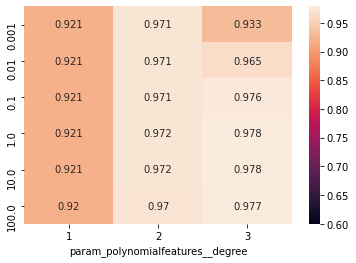

In [ ]:
import seaborn as sns  #using heatmap is to find out if the best performance  is on the boundary(corner) it may not in the range.
sns.heatmap(res1, annot=True, fmt=".3g", vmin=0.6)

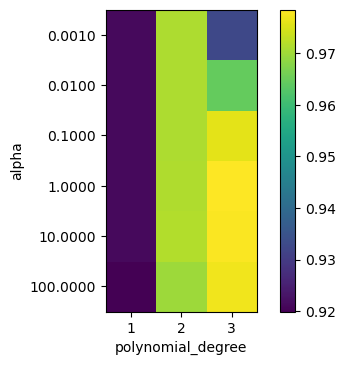

In [ ]:
plt.figure(dpi=100)
plt.imshow(res1) #, vmin=.70, vmax=.825)
plt.colorbar()
alphas = param_grid['ridge__alpha']
polynomial_degree = np.array(param_grid['polynomialfeatures__degree'])
plt.xlabel("polynomial_degree")
plt.ylabel("alpha")
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])
plt.xticks(range(len(polynomial_degree)), polynomial_degree);

In [ ]:
print("Best parameters: {}".format(grid_ridge.best_params_))
print("Best R^2 of validation set is: {:.3f}".format(grid_ridge.best_score_)) 
print("R^2 of test set is: {:.3f}".format(grid_ridge.score(X_test, y_test))) 

Best parameters: {'polynomialfeatures__degree': 3, 'ridge__alpha': 1}
Best R^2 of validation set is: 0.978
R^2 of test set is: 0.977


## Model 3: KNeighborsRegressor

- KNeighborsRegressor is a regression based on k-nearest neighbors with the target predicted by local interpolation of the targets associated of the nearest neighbors in the training set.
- For KNeighborsRegressor, we built a pipeline with n_neighbors = {1,3,5,7,9} using the training set. 
- Using 5-fold cross-validation with their default parameters and fit the training data, the best paramters generated has a n_neighbor = 5.
- The best score on the validation set is 0.960 and test set is 0.962. Showing better performance on test set.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
pipe_cat = OneHotEncoder()
pipe_num = StandardScaler()
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num)) 

pipe = make_pipeline(preprocessor, KNeighborsRegressor()) 
param_grid = {'kneighborsregressor__n_neighbors': [1,3,5,7,9]}

grid_knn = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1,return_train_score=True) 
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                          

In [ ]:
df_knn = pd.DataFrame(grid_knn.cv_results_)
df_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.090,0.009,217.996,0.014,1,{'kneighborsregressor__n_neighbors': 1},0.945,0.945,0.947,0.949,0.943,0.946,2.176e-03,5,1.000,1.000,1.000,1.000,1.000,1.000,2.102e-06
1,0.143,0.104,151.008,65.220,3,{'kneighborsregressor__n_neighbors': 3},0.958,0.956,0.960,0.961,0.958,0.959,1.664e-03,3,0.980,0.981,0.981,0.980,0.981,0.981,3.269e-04
2,0.347,0.191,140.931,46.114,5,{'kneighborsregressor__n_neighbors': 5},0.959,0.958,0.961,0.961,0.960,0.960,1.032e-03,1,0.974,0.975,0.974,0.974,0.974,0.974,2.630e-04
3,0.404,0.225,83.639,69.752,7,{'kneighborsregressor__n_neighbors': 7},0.958,0.958,0.960,0.960,0.960,0.959,7.599e-04,2,0.970,0.970,0.970,0.970,0.970,0.970,2.715e-04
4,0.547,0.089,39.673,11.668,9,{'kneighborsregressor__n_neighbors': 9},0.957,0.957,0.958,0.959,0.958,0.958,8.955e-04,4,0.967,0.967,0.967,0.966,0.967,0.967,3.511e-04


<ipython-input-39-ffe6a6c6c6cc>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(df_knn.param_kneighborsregressor__n_neighbors.astype(np.int),
<ipython-input-39-ffe6a6c6c6cc>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional 

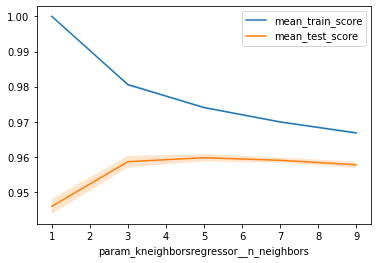

In [ ]:
df_knn.plot('param_kneighborsregressor__n_neighbors', 'mean_train_score')
df_knn.plot('param_kneighborsregressor__n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(df_knn.param_kneighborsregressor__n_neighbors.astype(np.int),
                 df_knn['mean_train_score'] + df_knn['std_train_score'],
                 df_knn['mean_train_score'] - df_knn['std_train_score'], alpha=0.2)
plt.fill_between(df_knn.param_kneighborsregressor__n_neighbors.astype(np.int),
                 df_knn['mean_test_score'] + df_knn['std_test_score'],
                 df_knn['mean_test_score'] - df_knn['std_test_score'], alpha=0.2)
plt.legend()
#shadow is the standard deviation of the performance

In [ ]:
print("Best parameters: {}".format(grid_knn.best_params_))
print("Best R^2 of validation set is: {:.3f}".format(grid_knn.best_score_)) 
print("R^2 of test set is: {:.3f}".format(grid_knn.score(X_test, y_test))) 

Best parameters: {'kneighborsregressor__n_neighbors': 5}
Best R^2 of validation set is: 0.960
R^2 of test set is: 0.962


## Model 4: Random Forest

- A random forest regressor is a meta estimator that fits a number of classifying decision trees on various sub-samples of the data set while using averageting to improve the predictive accuracy and control overfitting.
- For random forest regressor, we built a pipeline with max_features = [4,8,12,16] and max_depth = [4,6,8,10,12] using the training set.
- Using 5-fold cross-validation with their default parameters and fit the training data, the best paramters generated has a max_depth of 12 and max_features of 16.
- By visuazling the best r^2 on heat maps, the best parameter is on the border, indicating that we could possibly add another layer of max_depth and max_features  to further explore. However, due to the size of the data set and extensive run time, we decide to keep the current parameters as the best parameters.
- The best score on the validation set is 0.978 and test set is 0.977.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
pipe_cat = OneHotEncoder()
pipe_num = StandardScaler()
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num)) 

pipe = make_pipeline(preprocessor, RandomForestRegressor()) 

np.set_printoptions(precision=6, suppress=True)
param_grid = {'randomforestregressor__max_features': [4,8,12,16],
              'randomforestregressor__max_depth': [4,6,8,10,12]} 

grid_random = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1,return_train_score=True) 
grid_random.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                          

In [ ]:
df_random = pd.DataFrame(grid_random.cv_results_)
df_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.503,0.013,0.060,1.204e-03,4,4,"{'randomforestregressor__max_depth': 4, 'rando...",0.869,0.871,0.874,0.862,0.861,0.867,4.883e-03,20,0.871,0.869,0.878,0.859,0.867,0.869,6.074e-03
1,2.365,0.008,0.063,7.119e-04,4,8,"{'randomforestregressor__max_depth': 4, 'rando...",0.902,0.905,0.902,0.905,0.902,0.903,1.503e-03,19,0.904,0.905,0.906,0.903,0.905,0.904,1.021e-03
2,3.190,0.017,0.064,1.183e-03,4,12,"{'randomforestregressor__max_depth': 4, 'rando...",0.906,0.908,0.906,0.912,0.905,0.907,2.331e-03,18,0.909,0.909,0.909,0.909,0.908,0.909,3.875e-04
3,4.110,0.057,0.065,9.340e-04,4,16,"{'randomforestregressor__max_depth': 4, 'rando...",0.907,0.908,0.906,0.912,0.906,0.908,2.111e-03,17,0.909,0.910,0.910,0.910,0.909,0.910,5.281e-04
4,2.028,0.051,0.074,1.820e-03,6,4,"{'randomforestregressor__max_depth': 6, 'rando...",0.918,0.918,0.917,0.921,0.919,0.918,1.327e-03,16,0.921,0.919,0.921,0.920,0.922,0.920,1.072e-03
5,3.133,0.019,0.074,3.321e-03,6,8,"{'randomforestregressor__max_depth': 6, 'rando...",0.933,0.935,0.934,0.936,0.935,0.935,8.049e-04,15,0.937,0.937,0.937,0.936,0.937,0.937,3.857e-04
6,4.390,0.047,0.081,1.811e-03,6,12,"{'randomforestregressor__max_depth': 6, 'rando...",0.938,0.938,0.939,0.941,0.939,0.939,8.728e-04,14,0.942,0.941,0.941,0.941,0.941,0.941,2.747e-04
7,5.620,0.048,0.077,2.219e-03,6,16,"{'randomforestregressor__max_depth': 6, 'rando...",0.940,0.939,0.939,0.943,0.941,0.940,1.366e-03,13,0.943,0.942,0.943,0.943,0.942,0.942,3.658e-04
8,2.429,0.031,0.088,2.607e-03,8,4,"{'randomforestregressor__max_depth': 8, 'rando...",0.942,0.944,0.943,0.945,0.942,0.943,1.200e-03,12,0.948,0.947,0.948,0.948,0.946,0.947,7.470e-04
9,3.877,0.035,0.092,2.289e-03,8,8,"{'randomforestregressor__max_depth': 8, 'rando...",0.955,0.955,0.955,0.958,0.955,0.955,1.063e-03,11,0.960,0.959,0.959,0.959,0.958,0.959,7.256e-04


In [ ]:
res2 = pd.pivot_table(pd.DataFrame(grid_random.cv_results_), values='mean_test_score', 
                     index='param_randomforestregressor__max_depth', columns='param_randomforestregressor__max_features')
pd.set_option("display.precision",4)
res2 = res2.set_index(res2.index.values.round(4))
res2

param_randomforestregressor__max_features,4,8,12,16
4,0.8672,0.9031,0.9073,0.9080
6,0.9182,0.9345,0.9390,0.9403
8,0.9433,0.9555,0.9591,0.9604
10,0.9581,0.9683,0.9718,0.9726
12,0.9676,0.9757,0.9775,0.9783


<AxesSubplot:xlabel='param_randomforestregressor__max_features'>

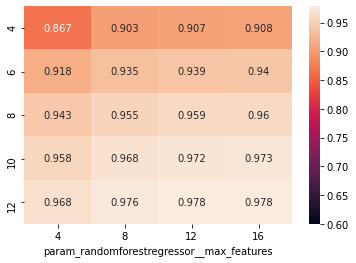

In [ ]:
import seaborn as sns
sns.heatmap(res2, annot=True, fmt=".3g", vmin=0.6)

In [ ]:
print("Best parameters: {}".format(grid_random.best_params_))
print("Best R^2 of validation set is: {:.3f}".format(grid_random.best_score_)) 
print("R^2 of test set is: {:.3f}".format(grid_random.score(X_test, y_test))) 

Best parameters: {'randomforestregressor__max_depth': 12, 'randomforestregressor__max_features': 16}
Best R^2 of validation set is: 0.978
R^2 of test set is: 0.977


## Model 5: Linear SVR

- LinearSVR has more flexibility in the choice of penalties and loss functions and should scale better to large number of samples. Therefore, we decided to use LinearSVR for our data set.
- For LinearSVR, we built a pipeline with svr_c = [1, 10, 100]. 
- Using 5-fold cross-validation with their default parameters and fit the training data, the best paramters generated has svr_c of 100.
- The best score on the validation set is 0.953 and test set is 0.956. Showing better performance on testset.

In [ ]:
from sklearn.svm import SVR
pipe_cat = OneHotEncoder()
pipe_num = StandardScaler()
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num)) 

pipe = make_pipeline(preprocessor, SVR()) 
param_grid = {'svr__C': [1,10,100]}      

grid_svr = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1,return_train_score=True) 
grid_svr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                          

In [ ]:
df_svr = pd.DataFrame(grid_svr.cv_results_)
df_svr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,110.9241,0.1507,56.5311,0.0810,1,{'svr__C': 1},0.4609,0.4560,0.4474,0.4659,0.4517,0.4564,0.0065,3,0.4567,0.4547,0.4566,0.4562,0.4583,0.4565,0.0012
1,99.8276,4.5634,53.3936,3.4561,10,{'svr__C': 10},0.8534,0.8561,0.8439,0.8564,0.8480,0.8516,0.0049,2,0.8524,0.8509,0.8530,0.8519,0.8518,0.8520,0.0007
2,94.5787,0.3655,49.6576,0.2510,100,{'svr__C': 100},0.9524,0.9564,0.9487,0.9550,0.9522,0.9529,0.0027,1,0.9544,0.9532,0.9546,0.9533,0.9535,0.9538,0.0006


<ipython-input-48-7a9e222032bf>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(df_svr.param_svr__C.astype(np.int),
<ipython-input-48-7a9e222032bf>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in

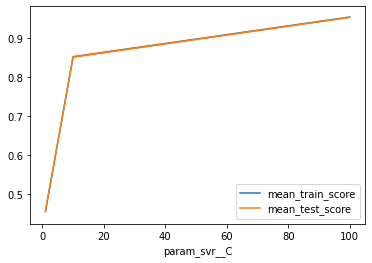

In [ ]:
#plot
df_svr.plot('param_svr__C', 'mean_train_score')
df_svr.plot('param_svr__C', 'mean_test_score', ax=plt.gca())
plt.fill_between(df_svr.param_svr__C.astype(np.int),
                 df_svr['mean_train_score'] + df_svr['std_train_score'],
                 df_svr['mean_train_score'] - df_svr['std_train_score'], alpha=0.2)
plt.fill_between(df_svr.param_svr__C.astype(np.int),
                 df_svr['mean_test_score'] + df_svr['std_test_score'],
                 df_svr['mean_test_score'] - df_svr['std_test_score'], alpha=0.2)
plt.legend()
#shadow is the standard deviation of the performance.

In [ ]:
print("Best parameters: {}".format(grid_svr.best_params_))
print("Best R^2 of validation set is: {:.3f}".format(grid_svr.best_score_)) 
print("R^2 of test set is: {:.3f}".format(grid_svr.score(X_test, y_test))) 

Best parameters: {'svr__C': 100}
Best R^2 of validation set is: 0.953
R^2 of test set is: 0.956


## Model 6: Gradient Boosting Regressor

- Gradient boosting regressor often provided accuracy that cannot be trumped with lots of flexibility to optimize on different loss functions and provides multiple hyperparamter tuning options to make the function fit very flexible which is suitable for our chosen data set.
- For graident boosting regressor, we built a pipeline with learning rate: np.logspace(-2, 0, 3) and n_estimators: [10, 100, 1000].
- Using 5-fold cross-validation with their default parameters and fit the training data, the best paramters generated has a learning rate of 0.1 and n_estimators of 1000.
- By visuazling the best r^2 on heat maps, the best parameter is on the border, indicating that we could possibly add another layer of learning rate and n_estimators to further explore. However, due to the size of the data set and extensive run time, we decide to keep the current parameters as the best parameters.
- The best score on the validation set is 0.979 and testset is 0.978. 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

pipe_cat = OneHotEncoder()
pipe_num = StandardScaler()
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num)) 
pipe = make_pipeline(preprocessor, GradientBoostingRegressor())  

np.set_printoptions(precision=6, suppress=True)   
param_grid = {'gradientboostingregressor__learning_rate': np.logspace(-2, 0, 3), 
              'gradientboostingregressor__n_estimators': [10, 100, 1000]} 

grid_gb = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1,return_train_score=True) 
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                          

In [ ]:
import pandas as pd
df_gb = pd.DataFrame(grid_gb.cv_results_)
df_gb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingregressor__learning_rate,param_gradientboostingregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.8699,0.0063,0.0181,0.0010,0.01,10,{'gradientboostingregressor__learning_rate': 0...,0.1600,0.1592,0.1592,0.1606,0.1562,0.1590,0.0015,9,0.1593,0.1591,0.1594,0.1591,0.1593,0.1592,1.3553e-04
1,7.5371,0.0128,0.0354,0.0004,0.01,100,{'gradientboostingregressor__learning_rate': 0...,0.7714,0.7725,0.7713,0.7760,0.7636,0.7709,0.0041,8,0.7721,0.7717,0.7726,0.7716,0.7724,0.7721,3.6385e-04
2,76.6849,0.0786,0.1707,0.0042,0.01,1000,{'gradientboostingregressor__learning_rate': 0...,0.9650,0.9667,0.9657,0.9680,0.9668,0.9664,0.0010,5,0.9687,0.9681,0.9684,0.9681,0.9682,0.9683,2.1653e-04
3,0.8072,0.0045,0.0180,0.0003,0.1,10,{'gradientboostingregressor__learning_rate': 0...,0.7824,0.7837,0.7827,0.7876,0.7752,0.7823,0.0040,7,0.7833,0.7829,0.7838,0.7834,0.7842,0.7835,4.5749e-04
4,7.6567,0.0476,0.0313,0.0002,0.1,100,{'gradientboostingregressor__learning_rate': 0...,0.9650,0.9674,0.9666,0.9685,0.9675,0.9670,0.0012,4,0.9689,0.9691,0.9690,0.9687,0.9687,0.9689,1.8418e-04
5,75.0279,2.6401,0.1277,0.0046,0.1,1000,{'gradientboostingregressor__learning_rate': 0...,0.9771,0.9792,0.9783,0.9794,0.9799,0.9788,0.0010,1,0.9858,0.9860,0.9862,0.9860,0.9857,0.9860,1.8619e-04
6,0.8252,0.0053,0.0174,0.0006,1.0,10,{'gradientboostingregressor__learning_rate': 1...,0.9598,0.9605,0.9579,0.9606,0.9636,0.9605,0.0019,6,0.9648,0.9620,0.9610,0.9610,0.9641,0.9626,1.5898e-03
7,7.6630,0.0760,0.0282,0.0006,1.0,100,{'gradientboostingregressor__learning_rate': 1...,0.9740,0.9763,0.9755,0.9744,0.9763,0.9753,0.0009,2,0.9842,0.9835,0.9836,0.9827,0.9842,0.9836,5.4075e-04
8,64.8025,1.7278,0.0841,0.0117,1.0,1000,{'gradientboostingregressor__learning_rate': 1...,0.9711,0.9726,0.9704,0.9719,0.9732,0.9719,0.0010,3,0.9945,0.9947,0.9947,0.9945,0.9947,0.9946,7.1852e-05


In [ ]:
res3 = pd.pivot_table(pd.DataFrame(grid_gb.cv_results_), values='mean_test_score', index='param_gradientboostingregressor__learning_rate', columns='param_gradientboostingregressor__n_estimators')
pd.set_option("display.precision",4)
res3 = res3.set_index(res3.index.values.round(4))
res3

param_gradientboostingregressor__n_estimators,10,100,1000
0.01,0.1590,0.7709,0.9664
0.10,0.7823,0.9670,0.9788
1.00,0.9605,0.9753,0.9719


<AxesSubplot:xlabel='param_gradientboostingregressor__n_estimators'>

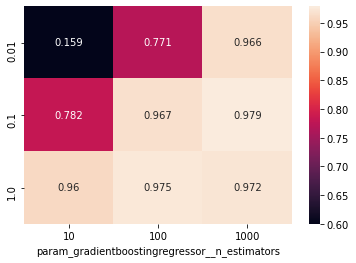

In [ ]:
import seaborn as sns
sns.heatmap(res3, annot=True, fmt=".3g", vmin=0.6)

In [ ]:
print("Best parameters: {}".format(grid_gb.best_params_))
print("Best R^2 of validation set is: {:.3f}".format(grid_gb.best_score_)) 
print("R^2 of test set is: {:.3f}".format(grid_gb.score(X_test, y_test)))

Best parameters: {'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__n_estimators': 1000}
Best R^2 of validation set is: 0.979
R^2 of test set is: 0.978


## Model 7: XGBoost Regressor

- XGBoost regressor consists a number of hyper-parameters that can be tuned with an in-built capability to handle missing values.
- For XGBoost regressor, we built a pipeline with the preprocessor.
- XGBoost internally has parameters for cross-validation, therefore, did not require GridSearchCV.
- The best score on the traning set is 0.991 and testing set is 0.980.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

pipe_cat = OneHotEncoder()
pipe_num = StandardScaler()
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num)) 
pipe_xg = make_pipeline(preprocessor, XGBRegressor())  
pipe_xg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cut', 'color', 'clarity']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_dept

In [ ]:
print("R^2 of training set is: {:.3f}".format(pipe_xg.score(X_train, y_train))) 
print("R^2 of test set is: {:.3f}".format(pipe_xg.score(X_test, y_test)))

R^2 of training set is: 0.991
R^2 of test set is: 0.980


## Model 8: Nueral Network - MLP Regressor

- Class MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as an activation function.
- In our model we used two different activation functions for hidden lay: ‘tanh’(default), the hyperbolic tan function, returns f(x) = tanh(x); ‘relu’, the rectified linear unit function, returns f(x) = max(0, x).
- In the MLPRegressor, we used solver "lbfgs" which is an optimizer in the family of quasi-Newton methods. And set the maximum number of iterations to 1000
- The R^2 by using relu method is 0.980 and for tanh method is 0.950.
- Overall, using MLP Regressor with relu method has a better performance.

In [ ]:
X = pd.get_dummies(X, columns=['cut', 'color', 'clarity'])
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_relu = MLPRegressor(solver="lbfgs", max_iter = 1000).fit(X_train, y_train)
mlp_tanh = MLPRegressor(solver="lbfgs", max_iter = 1000, activation='tanh').fit(X_train, y_train)

y_pred = mlp_relu.predict(X_test)
y_pred2 = mlp_tanh.predict(X_test)

from sklearn.metrics import r2_score
print("The score with mlp_relu", (r2_score(y_pred, y_test)))
print("The score with mlp_tanh", (r2_score(y_pred2, y_test)))

/Users/pengshuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The score with mlp_relu 0.9796972102206992
The score with mlp_tanh 0.9459567342496729


/Users/pengshuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Model 9: Nueral Network - Keras

- Keras is a simple tool for constructing a neural network. It is a high-level framework based on tensorflow, theano or cntk backends.
- The model is created sequentially and the output of each layer we add is input to the next layer we specify. The sequential model has a total parameter of 1,078,273.
- The R^2 of the test set of Keras is 0.976.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
from tensorflow import keras

model1 = keras.Sequential([        
    Dense(1024, input_shape=(26,), activation='relu'),
    Dense(1024, activation='relu'),
    Dense(1, activation='linear')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              27648     
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,078,273
Trainable params: 1,078,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [ ]:
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=.1)

Epoch 1/20
285/285 [==============================] - 12s 36ms/step - loss: 8115754.0000 - mse: 8115754.0000 - mae: 1452.7429 - val_loss: 680774.5625 - val_mse: 680774.5625 - val_mae: 534.8776
Epoch 2/20
285/285 [==============================] - 14s 49ms/step - loss: 607431.8750 - mse: 607431.8750 - mae: 494.3704 - val_loss: 560901.1875 - val_mse: 560901.1875 - val_mae: 459.6753
Epoch 3/20
285/285 [==============================] - 11s 40ms/step - loss: 513730.9062 - mse: 513730.9062 - mae: 415.1725 - val_loss: 479552.5625 - val_mse: 479552.5625 - val_mae: 378.9253
Epoch 4/20
285/285 [==============================] - 10s 37ms/step - loss: 455400.5625 - mse: 455400.5625 - mae: 367.8262 - val_loss: 439486.8750 - val_mse: 439486.8750 - val_mae: 355.7759
Epoch 5/20
285/285 [==============================] - 10s 36ms/step - loss: 428592.2188 - mse: 428592.2188 - mae: 352.1027 - val_loss: 411895.0312 - val_mse: 411895.0312 - val_mae: 340.9638
Epoch 6/20
285/285 [===========================

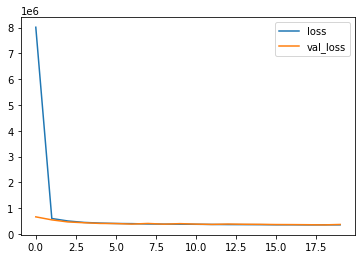

In [ ]:
#plot the loss and validation loss of the dataset
history1 = pd.DataFrame(history1.history)
plt.plot(history1['loss'], label='loss')
plt.plot(history1['val_loss'], label='val_loss')

plt.legend()

In [ ]:
y_pred = model1.predict(X_test)
from sklearn.metrics import r2_score

print("R^2 of test set is: {:.3f}".format((r2_score(y_pred, y_test))))

R^2 of test set is: 0.976


<img src="pic_6.png" />

## Best Model: XGB Regressor

By comparing the 9 different models, we determined that XGBoosting Regressor is the best regressor to use for the diamond price prediction problem since it returned the highest R^2 value of 0.9801. We also calculated its adjusted R^2 as well as other metrics below. 

In [ ]:
pred = pipe_xg.predict(X_test)
from sklearn import metrics
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9801830773317559
Adjusted R^2: 0.9801698317094749
MAE: 284.5232786251486
MSE: 301558.09007261303
RMSE: 549.143050645834


## Predict Diamond Price

In order to validate our model accuracy, we decided to create a dataframe with diamond information and statistics to see the predicted price for the specific 1.2 carat diamond with a premium cut, E color, and VS1 clarity. By comparing the price predicted to the price of similar diamonds in the data set, we believe that the XGBoosting Regressor produces a reliable price estimation.

In [ ]:
x= [[1.2 ,'Premium','E','VS1', 58, 57.0,6.50, 6.82, 4]]
df2 = pd.DataFrame(x, columns = ['carat', 'cut','color','clarity','depth','table','x','y','z'])
df2

,carat,cut,color,clarity,depth,table,x,y,z
0,1.2,Premium,E,VS1,58,57.0,6.5,6.82,4


In [ ]:
pipe_xg.predict(df2)

array([8395.687], dtype=float32)

<img src="pic7.png" />

- An accurate diamond price prediction model can help drive business success. 
- Implementing diamond price prediction as a part of the business process provides more insights & transparency for respective customers. By understanding the approximate pricing of the diamonds given their desired grade and quality, it will better help the customers to navigate the right diamonds during the selection process. 
- Given the high accuracy of our prediction model, it can be commercialized and used by customers and sellers as a useful price estimation tool.
- For customers, an accurate price prediction can be a helpful benchmark for them to compare to the actual diamond selling price on the market and evaluate if diamonds are priced fairly, especially for miserable boyfriends who do not have knowledge about diamonds. The price prediction model will help them to align their specifications to their budget in order to get the best diamonds they want.
- For sellers, the diamond price prediction is useful in their pricing strategies to ensure that their products are priced fairly and competitively in the market. Some luxurious jewelry brands' diamonds are a lot more expensive than other brands, indicating the customers willingly pay for the brand premiums. However, will the extreme high price scare away certain customers? Sellers can use the price prediction model as a tool to guide their market analysis and pricing strategy to determine what is the most reasonable pricing and bond premium for their diamonds that will intrigue the most amount of customers to buy from them.
